## Task-D: Collinear features and their effect on linear models

In [117]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

In [69]:
data = pd.read_csv('task_d.csv')

In [70]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [71]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Task - 1

<AxesSubplot:>

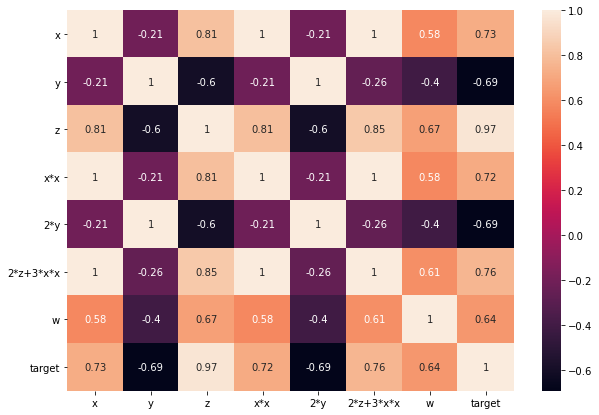

In [59]:
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(data.corr(), annot = True, ax=ax)

In [60]:
model = LogisticRegression()
penalty = ['l1','l2']
C = np.logspace(1,8,num=5)
alpha = dict(C=C, penalty = penalty)
clf = GridSearchCV(model, alpha, cv=5, verbose=0)
temp = clf.fit(X,Y)
print("Best alpha:", temp.best_estimator_.get_params()['C'])
print("Best score:", temp.best_score_)

Best alpha: 10.0
Best score: 1.0


In [61]:
best_model = LogisticRegression(penalty='l2', C=10)

In [80]:
best_model.fit(X,Y)

LogisticRegression(C=10)

In [119]:
y_pred = best_model.predict(X)
best_model_accuracy = best_model.score(X, y_pred)
print("Accuracy:",best_model_accuracy)

Accuracy: 1.0


In [82]:
W = best_model.coef_
print(W)

[[ 1.10390355 -1.31307824  2.97742302  0.97952119 -1.31307824  1.24104888
   0.65549702]]


In [73]:
X1 = X + 0.01

In [84]:
best_model.fit(X1,Y)
y_pred1 = best_model.predict(X1)
best_model_accuracy_edited = best_model.score(X1, y_pred1)
print(best_model_accuracy_edited)
W1 = best_model.coef_
print(W1)

1.0
[[ 1.10392869 -1.31306492  2.97744834  0.97946819 -1.31306492  1.24100273
   0.65559227]]


In [85]:
best_model_accuracy_edited - best_model_accuracy

0.0

In [87]:
diff_in_weights = abs(W1-W)
print(diff_in_weights)

[[2.51415473e-05 1.33256522e-05 2.53241049e-05 5.30064630e-05
  1.33256522e-05 4.61560009e-05 9.52478348e-05]]


In [142]:
feature_names = data.drop(['target'], axis=1).columns.tolist()

In [112]:
top_ind_pos=np.argsort(diff_in_weights[0])[::-1][:4]
top_features=np.take(feature_names,top_ind_pos)
print(top_features)

['w' 'x*x' '2*z+3*x*x' 'z']


### Observation:
* In heatmap image, the number tells correlation between each and every feature.
* The darker the color is, the least there is correlation between the features. The colors help in visualizing in a better way
* Using logspace for alpha, and l2 regularization, we get the accuracy of 1 and some weights assigned to the features.
* When noise of order of 10^-2 is added to data, the accuracy remains same.
* However, there is a slight difference visible in weights.
* ['w' 'x*x' '2*z+3*x*x' 'z'] are the features with higher difference in the weights before and after noise is added.

## Task - 2 (Linear SVM)

In [133]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X,Y)
y_pred_svm = clf.predict(X)  

In [139]:
clf_accuracy = metrics.accuracy_score(Y, y_pred_svm)
print("Accuracy:",clf_accuracy)

Accuracy: 1.0


In [135]:
print(clf.coef_)
W2 = clf.coef_
# [[ 1.10390355 -1.31307824  2.97742302  0.97952119 -1.31307824  1.24104888
#    0.65549702]]

[[ 0.42059793 -0.36090175  1.04442829  0.34263578 -0.36090175  0.43447147
   0.17056102]]


In [136]:
clf.fit(X1,Y)
y_pred2 = clf.predict(X1)
clf_accuracy_edited = clf.score(X1, y_pred2)
print(clf_accuracy_edited)
W3 = clf.coef_
print(W3)

1.0
[[ 0.42059794 -0.36090176  1.04442829  0.34263578 -0.36090176  0.43447147
   0.17056109]]


In [140]:
clf_accuracy_edited - clf_accuracy

0.0

In [144]:
diff_in_weights_svm = abs(W2-W3)
print(diff_in_weights_svm)

[[7.43466255e-09 7.75015030e-09 3.76125131e-10 9.42298461e-11
  7.75015030e-09 1.30218003e-10 6.79247940e-08]]


In [145]:
top_ind_pos=np.argsort(diff_in_weights_svm[0])[::-1][:4]
top_features_svm=np.take(feature_names,top_ind_pos)
print(top_features_svm)

['w' '2*y' 'y' 'x']


### Observation:
* Using logspace for alpha, and l2 regularization, we get the accuracy of 1 and some weights assigned to the features.
* When noise of order of 10^-2 is added to data, the accuracy remains same.
* However, there is a slight difference visible in weights.
* ['w' 'x*x' '2*z+3*x*x' 'z'] are the features with higher difference in the weights before and after noise is added.